# MODEL TRAINED IN TOMATO  TO PREDICT SORGHUM

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data load

In [2]:
sorghum = pd.read_csv('./data_sorghum.csv', sep=',')
tomato = pd.read_csv("./data_tomato.csv", sep=",") 

# Data Smoothing

In [3]:
ssorghum = sorghum
ssorghum['sCG'] = 0 
ssorghum['sCHG'] = 0 
ssorghum['sCHH'] = 0 
ssorghum['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(ssorghum)):
    if ssorghum.loc[i-1,'chr'] == ssorghum.loc[i,'chr']:
        ssorghum.loc[i, 'sCG'] = ssorghum.loc[i-1, 'CG']*0.1 + ssorghum.loc[i-1, 'sCG']*0.9
        ssorghum.loc[i, 'sCHG'] = ssorghum.loc[i-1, 'CHG']*0.1 + ssorghum.loc[i-1, 'sCHG']*0.9
        ssorghum.loc[i, 'sCHH'] = ssorghum.loc[i-1, 'CHH']*0.1 + ssorghum.loc[i-1, 'sCHH']*0.9  
        ssorghum.loc[i, 'srec'] = ssorghum.loc[i-1, 'rec']*0.1 + ssorghum.loc[i-1, 'srec']*0.9  
        
# Dataframes with chromosomes info
schr1 = ssorghum[ssorghum["chr"] == "chr1"]
schr2 = ssorghum[ssorghum["chr"] == "chr2"]
schr3 = ssorghum[ssorghum["chr"] == "chr3"]
schr4 = ssorghum[ssorghum["chr"] == "chr4"]
schr5 = ssorghum[ssorghum["chr"] == "chr5"]
schr6 = ssorghum[ssorghum["chr"] == "chr6"]
schr7 = ssorghum[ssorghum["chr"] == "chr7"]
schr8 = ssorghum[ssorghum["chr"] == "chr8"]
schr9 = ssorghum[ssorghum["chr"] == "chr9"]
schr10 = ssorghum[ssorghum["chr"] == "chr10"]
schr11 = ssorghum[ssorghum["chr"] == "chr11"]
schr12 = ssorghum[ssorghum["chr"] == "chr12"]

In [4]:
stomato = tomato
stomato['sCG'] = 0 
stomato['sCHG'] = 0 
stomato['sCHH'] = 0 
stomato['srec'] = 0 

# Simple exponential smoothing at 0.9  
for i in  range(1, len(stomato)):
    if stomato.loc[i-1,'chr'] == stomato.loc[i,'chr']:
        stomato.loc[i, 'sCG'] = stomato.loc[i-1, 'CG']*0.1 + stomato.loc[i-1, 'sCG']*0.9
        stomato.loc[i, 'sCHG'] = stomato.loc[i-1, 'CHG']*0.1 + stomato.loc[i-1, 'sCHG']*0.9
        stomato.loc[i, 'sCHH'] = stomato.loc[i-1, 'CHH']*0.1 + stomato.loc[i-1, 'sCHH']*0.9  
        stomato.loc[i, 'srec'] = stomato.loc[i-1, 'rec']*0.1 + stomato.loc[i-1, 'srec']*0.9  

# Model trained In Tomato

In [5]:
# TRAINING MODEL
X = stomato[['sCG','sCHG','sCHH']]
y = stomato[['srec']]
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
model_preds = model.predict(schr1[['sCG','sCHG','sCHH']])

# Predictions

Correlation: 0.6765499478804193
Coefficient of Determination: -0.4648225648098674
Mean Squared Error: 0.0764201948449103


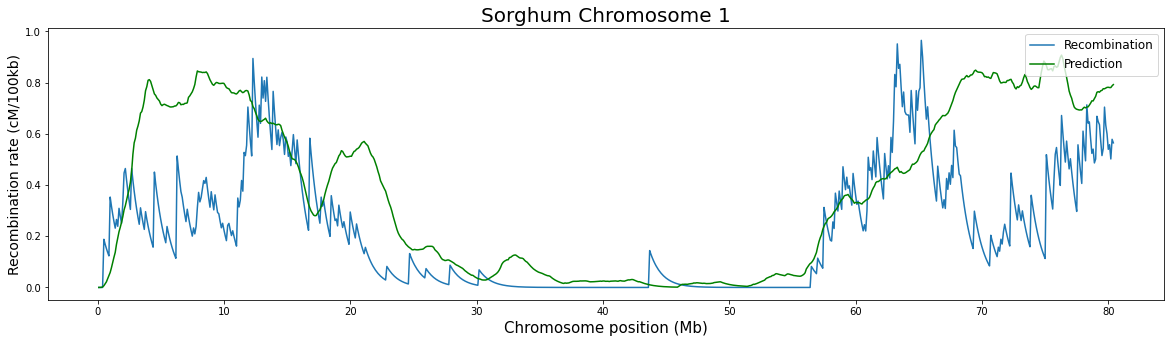

In [6]:
model_preds = model.predict(schr1[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr1 = model_spreds      
    
#PARAMETERS
corr_chr1 = pearsonr(schr1.srec, pchr1)
r2_chr1 = r2_score(schr1.srec, pchr1)
mse_chr1 = mean_squared_error(schr1.srec, pchr1)
print('Correlation:', corr_chr1[0])
print('Coefficient of Determination:', r2_chr1)
print('Mean Squared Error:', mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr1.window_end,schr1.srec, label='Recombination')
ax.plot(schr1.window_end,pchr1, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 1',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.854234111463556
Coefficient of Determination: 0.4704549602534085
Mean Squared Error: 0.029961938594876746


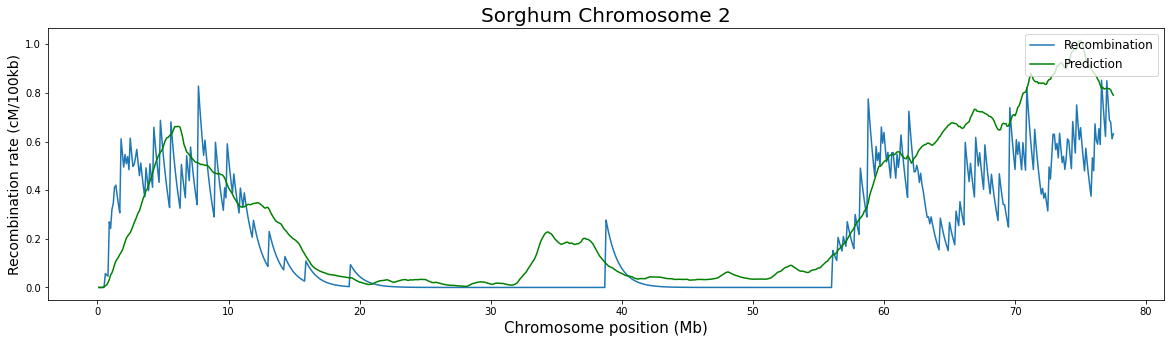

In [7]:
model_preds = model.predict(schr2[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr2 = model_spreds      
    
#PARAMETERS
corr_chr2 = pearsonr(schr2.srec, pchr2)
r2_chr2 = r2_score(schr2.srec, pchr2)
mse_chr2 = mean_squared_error(schr2.srec, pchr2)
print('Correlation:', corr_chr2[0])
print('Coefficient of Determination:', r2_chr2)
print('Mean Squared Error:', mse_chr2)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr2.window_end,schr2.srec, label='Recombination')
ax.plot(schr2.window_end,pchr2, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 2',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.7103621739286214
Coefficient of Determination: -1.008482651839068
Mean Squared Error: 0.07823364080585782


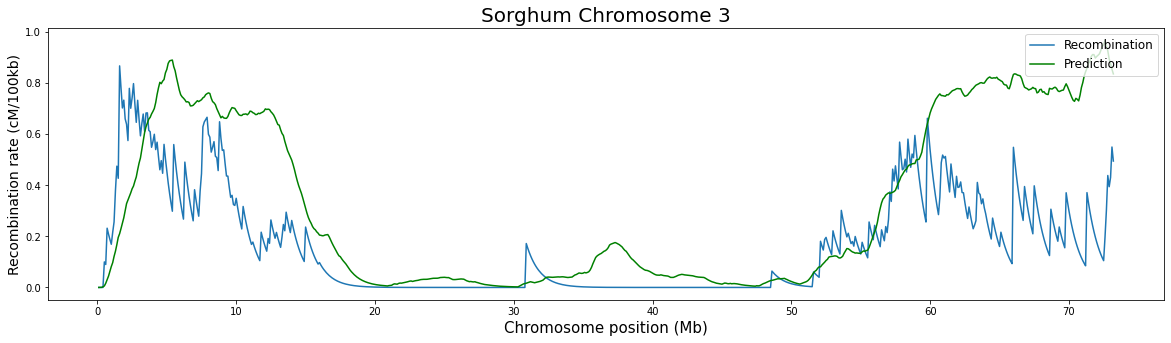

In [8]:
model_preds = model.predict(schr3[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr3 = model_spreds      
    
#PARAMETERS
corr_chr3 = pearsonr(schr3.srec, pchr3)
r2_chr3 = r2_score(schr3.srec, pchr3)
mse_chr3 = mean_squared_error(schr3.srec, pchr3)
print('Correlation:', corr_chr3[0])
print('Coefficient of Determination:', r2_chr3)
print('Mean Squared Error:', mse_chr3)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr3.window_end,schr3.srec, label='Recombination')
ax.plot(schr3.window_end,pchr3, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 3',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.7425257971277621
Coefficient of Determination: 0.05919692515706565
Mean Squared Error: 0.05099919225670704


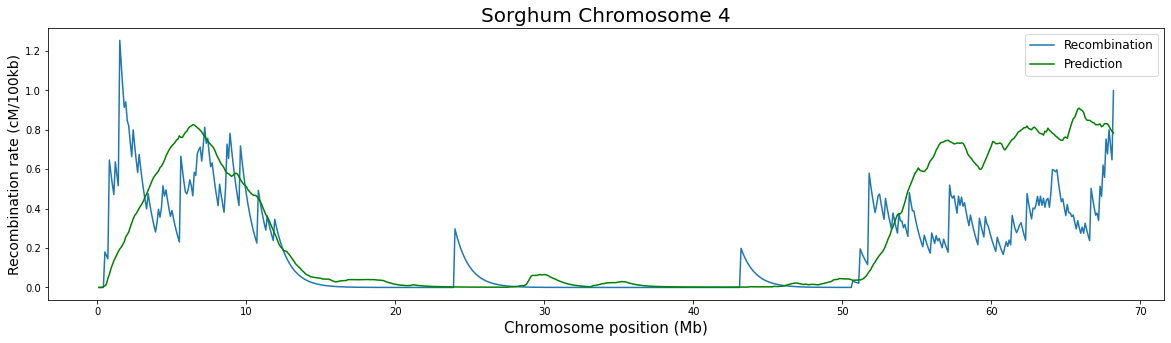

In [9]:
model_preds = model.predict(schr4[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr4 = model_spreds      
    
#PARAMETERS
corr_chr4 = pearsonr(schr4.srec, pchr4)
r2_chr4 = r2_score(schr4.srec, pchr4)
mse_chr4 = mean_squared_error(schr4.srec, pchr4)
print('Correlation:', corr_chr4[0])
print('Coefficient of Determination:', r2_chr4)
print('Mean Squared Error:', mse_chr4)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr4.window_end,schr4.srec, label='Recombination')
ax.plot(schr4.window_end,pchr4, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 4',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8737165578585345
Coefficient of Determination: 0.7000471514166318
Mean Squared Error: 0.017760987850143024


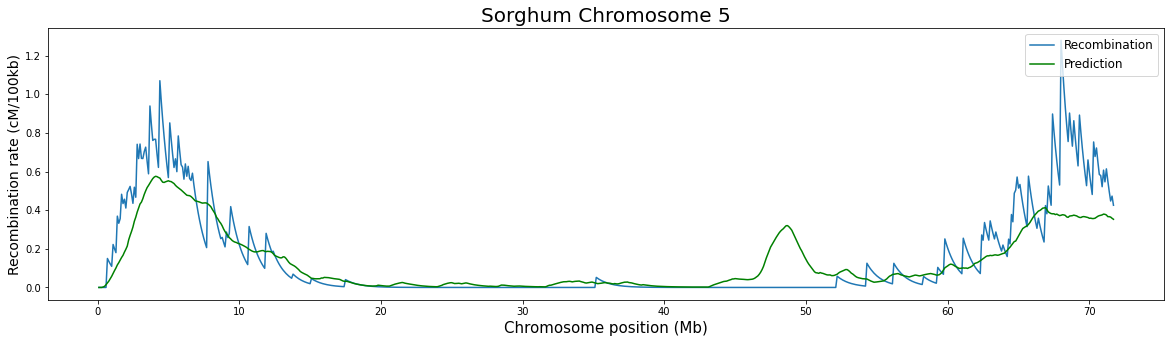

In [10]:
model_preds = model.predict(schr5[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr5 = model_spreds      
    
#PARAMETERS
corr_chr5 = pearsonr(schr5.srec, pchr5)
r2_chr5 = r2_score(schr5.srec, pchr5)
mse_chr5 = mean_squared_error(schr5.srec, pchr5)
print('Correlation:', corr_chr5[0])
print('Coefficient of Determination:', r2_chr5)
print('Mean Squared Error:', mse_chr5)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr5.window_end,schr5.srec, label='Recombination')
ax.plot(schr5.window_end,pchr5, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 5',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8146318737757091
Coefficient of Determination: 0.1357799026892601
Mean Squared Error: 0.042049410034423675


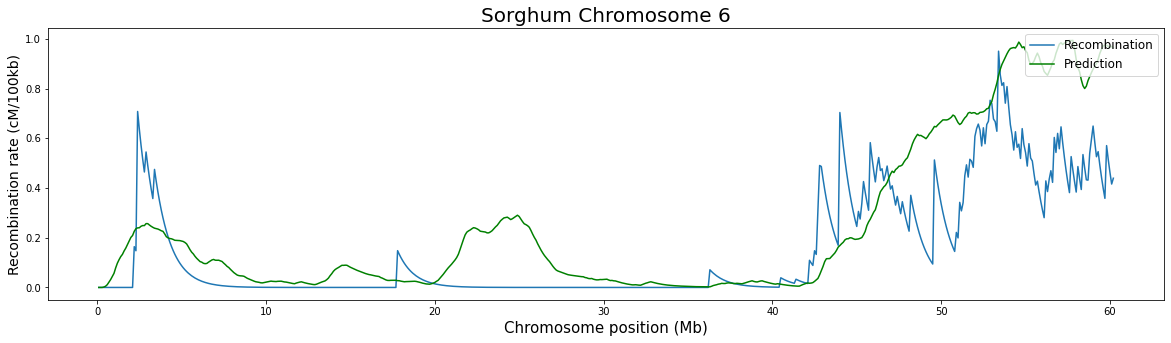

In [11]:
model_preds = model.predict(schr6[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr6 = model_spreds      
    
#PARAMETERS
corr_chr6 = pearsonr(schr6.srec, pchr6)
r2_chr6 = r2_score(schr6.srec, pchr6)
mse_chr6 = mean_squared_error(schr6.srec, pchr6)
print('Correlation:', corr_chr6[0])
print('Coefficient of Determination:', r2_chr6)
print('Mean Squared Error:', mse_chr6)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr6.window_end,schr6.srec, label='Recombination')
ax.plot(schr6.window_end,pchr6, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 6',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9125509184877213
Coefficient of Determination: 0.8043511302742041
Mean Squared Error: 0.012241581552374106


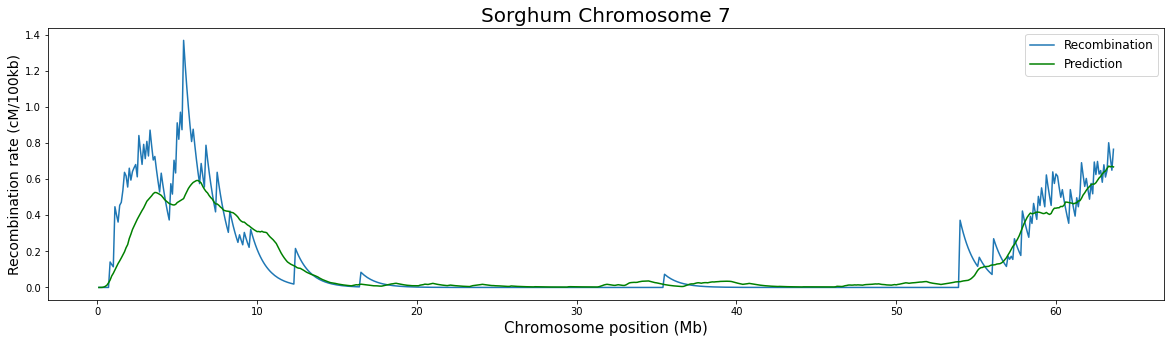

In [12]:
model_preds = model.predict(schr7[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr7 = model_spreds      
    
#PARAMETERS
corr_chr7 = pearsonr(schr7.srec, pchr7)
r2_chr7 = r2_score(schr7.srec, pchr7)
mse_chr7 = mean_squared_error(schr7.srec, pchr7)
print('Correlation:', corr_chr7[0])
print('Coefficient of Determination:', r2_chr7)
print('Mean Squared Error:', mse_chr7)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr7.window_end,schr7.srec, label='Recombination')
ax.plot(schr7.window_end,pchr7, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 7',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.9101442903093757
Coefficient of Determination: 0.7285839263970645
Mean Squared Error: 0.024194805331098655


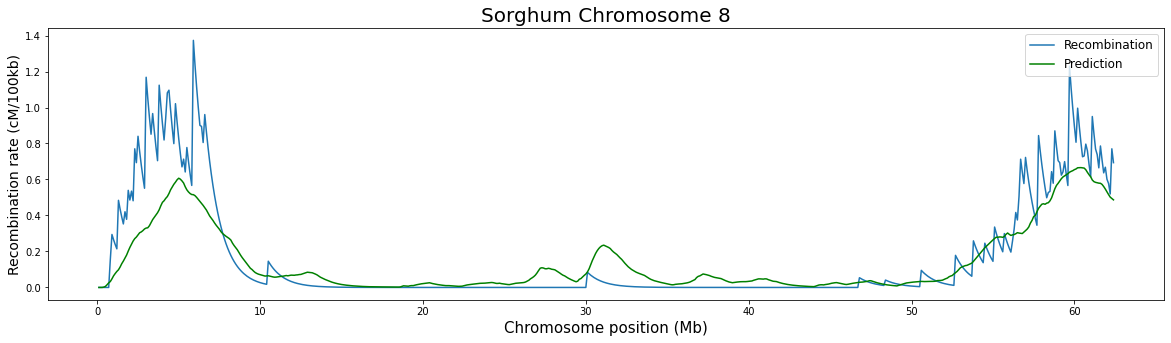

In [13]:
model_preds = model.predict(schr8[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr8 = model_spreds      
    
#PARAMETERS
corr_chr8 = pearsonr(schr8.srec, pchr8)
r2_chr8 = r2_score(schr8.srec, pchr8)
mse_chr8 = mean_squared_error(schr8.srec, pchr8)
print('Correlation:', corr_chr8[0])
print('Coefficient of Determination:', r2_chr8)
print('Mean Squared Error:', mse_chr8)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr8.window_end,schr8.srec, label='Recombination')
ax.plot(schr8.window_end,pchr8, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 8',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.852862923395502
Coefficient of Determination: 0.705058085883177
Mean Squared Error: 0.017528802573189454


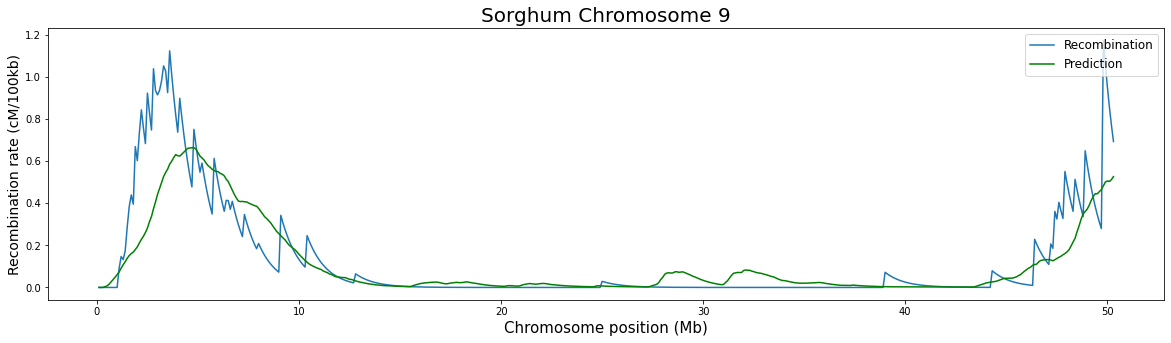

In [14]:
model_preds = model.predict(schr9[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr9 = model_spreds      
    
#PARAMETERS
corr_chr9 = pearsonr(schr9.srec, pchr9)
r2_chr9 = r2_score(schr9.srec, pchr9)
mse_chr9 = mean_squared_error(schr9.srec, pchr9)
print('Correlation:', corr_chr9[0])
print('Coefficient of Determination:', r2_chr9)
print('Mean Squared Error:', mse_chr9)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr9.window_end,schr9.srec, label='Recombination')
ax.plot(schr9.window_end,pchr9, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 9',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

Correlation: 0.8091778258591049
Coefficient of Determination: 0.6346345056563953
Mean Squared Error: 0.028051829442242136


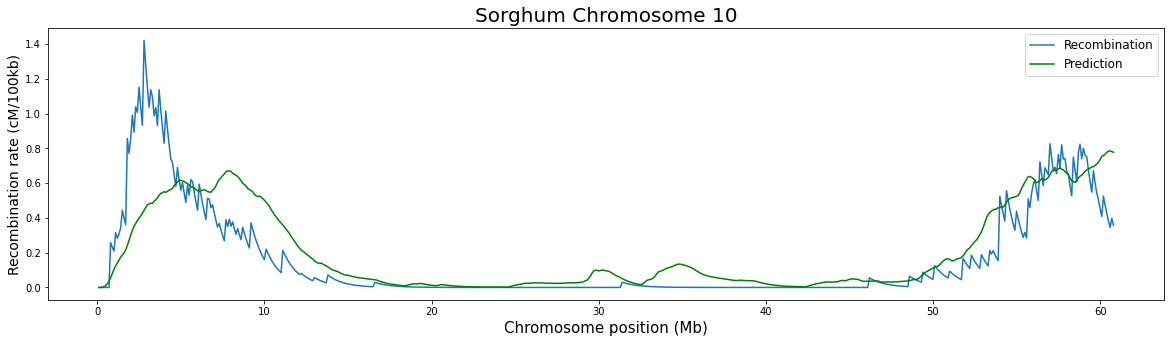

In [15]:
model_preds = model.predict(schr10[['sCG','sCHG','sCHH']])

#SMOOTHING
model_spreds= np.zeros(len(model_preds))

for i in  range(1, len(model_preds)): 
    model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9

pchr10 = model_spreds      
    
#PARAMETERS
corr_chr10 = pearsonr(schr10.srec, pchr10)
r2_chr10 = r2_score(schr10.srec, pchr10)
mse_chr10 = mean_squared_error(schr10.srec, pchr10)
print('Correlation:', corr_chr10[0])
print('Coefficient of Determination:', r2_chr10)
print('Mean Squared Error:', mse_chr10)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(schr10.window_end,schr10.srec, label='Recombination')
ax.plot(schr10.window_end,pchr10, label = 'Prediction',  color ='green')
plt.title('Sorghum Chromosome 10',fontsize=20) 
ax.set_xlabel('Chromosome position (Mb)', fontsize=15)
ax.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
ax.legend(loc='upper right', fontsize=12)
ticks = ax.get_xticks()/1000000
ax.set_xticklabels(ticks.astype(int))
plt.show()

# Compiling results

In [16]:
corr = pd.DataFrame({'corr':[corr_chr1[0], corr_chr2[0], corr_chr3[0], corr_chr4[0], corr_chr5[0], corr_chr6[0], corr_chr7[0], corr_chr8[0], corr_chr9[0], corr_chr10[0]]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9, r2_chr10]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9, mse_chr10]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10',]})
results = pd.concat([index, corr, r2, mse], axis=1)
results

,chr,corr,R^2,MSE
0,chr1,0.676550,-0.464823,0.076420
1,chr2,0.854234,0.470455,0.029962
2,chr3,0.710362,-1.008483,0.078234
3,chr4,0.742526,0.059197,0.050999
4,chr5,0.873717,0.700047,0.017761
5,chr6,0.814632,0.135780,0.042049
6,chr7,0.912551,0.804351,0.012242
7,chr8,0.910144,0.728584,0.024195
8,chr9,0.852863,0.705058,0.017529
9,chr10,0.809178,0.634635,0.028052


In [17]:
results.describe()

,corr,R^2,MSE
count,10.000000,10.000000,10.000000
mean,0.815676,0.276480,0.037744
std,0.081914,0.603665,0.023865
min,0.676550,-1.008483,0.012242
25%,0.759189,0.078343,0.019369
50%,0.833747,0.552545,0.029007
75%,0.868846,0.703805,0.048762
max,0.912551,0.804351,0.078234
